In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
df.sample(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
297,298,320,120,3,4.0,4.5,9.11,0,0.86
20,21,312,107,3,3.0,2.0,7.90,1,0.64
82,83,320,110,5,5.0,4.5,9.22,1,0.92
303,304,323,107,3,3.5,3.5,8.55,1,0.73
335,336,325,111,4,4.0,4.5,9.11,1,0.83
184,185,316,106,2,2.5,4.0,8.32,0,0.72
467,468,318,101,5,3.5,5.0,8.78,1,0.78
109,110,304,103,5,5.0,4.0,8.64,0,0.68
65,66,325,112,4,3.5,3.5,8.92,0,0.55
257,258,324,100,3,4.0,5.0,8.64,1,0.78


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.shape

(500, 9)

In [8]:
df.drop(columns=['Serial No.'], inplace=True)

In [9]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [10]:
X = df.iloc[:,0:-1]

In [11]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [12]:
Y = df['Chance of Admit ']

In [13]:
Y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
Xtrain

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
249,321,111,3,3.5,4.0,8.83,1
433,316,111,4,4.0,5.0,8.54,0
19,303,102,3,3.5,3.0,8.50,0
322,314,107,2,2.5,4.0,8.27,0
332,308,106,3,3.5,2.5,8.21,1
...,...,...,...,...,...,...,...
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0
435,309,105,2,2.5,4.0,7.68,0


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [18]:
Xtrain_scaled=  scaler.fit_transform(Xtrain)

In [19]:
Xtest_scaled = scaler.transform(Xtest)

In [20]:
Xtrain_scaled

array([[0.62      , 0.67857143, 0.5       , ..., 0.71428571, 0.65064103,
        1.        ],
       [0.52      , 0.67857143, 0.75      , ..., 1.        , 0.55769231,
        0.        ],
       [0.26      , 0.35714286, 0.5       , ..., 0.42857143, 0.54487179,
        0.        ],
       ...,
       [0.24      , 0.25      , 0.        , ..., 0.14285714, 0.14423077,
        0.        ],
       [0.38      , 0.46428571, 0.25      , ..., 0.71428571, 0.28205128,
        0.        ],
       [0.48      , 0.5       , 0.25      , ..., 0.57142857, 0.46474359,
        0.        ]])

In [22]:
import tensorflow

In [23]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense



In [24]:
model = Sequential()

In [ ]:
model.add(Dense(7, activation='relu', input_dim= 7))
model.add(Dense(7, activation='relu', input_dim= 7))
model.add(Dense(1, activation='linear'))

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss='mean_squared_error', optimizer='Adam')

In [30]:
history = model.fit(Xtrain_scaled, Ytrain, epochs=100, validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - val_loss: 0.0038
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0032 - val_loss: 0.0038
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0030 - val_loss: 0.0038
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0031 - val_loss: 0.0038
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032 - val_loss: 0.0038
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0031 - val_loss: 0.0038
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0035 - val_loss: 0.0038
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0031 - val_loss: 0.0038
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - val_loss: 0.0038
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0

# Predictions

In [92]:
Ypred = model.predict(Xtest_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [93]:
Ypred

array([[0.9272389 ],
       [0.8081806 ],
       [0.5587571 ],
       [0.7269657 ],
       [0.82858646],
       [0.8773604 ],
       [0.48769635],
       [0.65754443],
       [0.8305764 ],
       [0.8002798 ],
       [0.7039041 ],
       [0.69894236],
       [0.66329026],
       [0.9465268 ],
       [0.8377884 ],
       [0.5224565 ],
       [0.85231584],
       [0.606813  ],
       [0.5448952 ],
       [0.5571289 ],
       [0.65858334],
       [0.56482834],
       [0.73984617],
       [0.8024445 ],
       [0.78690356],
       [0.6174013 ],
       [0.9512109 ],
       [0.8680555 ],
       [0.64515656],
       [0.75537306],
       [0.49031776],
       [0.7016806 ],
       [0.57967967],
       [0.86596507],
       [0.6599608 ],
       [0.7403845 ],
       [0.5738736 ],
       [0.9668653 ],
       [0.64607096],
       [0.7306741 ],
       [0.98777634],
       [0.58408576],
       [0.6730811 ],
       [0.8689585 ],
       [0.94939727],
       [0.57278085],
       [0.9704184 ],
       [0.844

In [94]:
from sklearn.metrics import r2_score

In [95]:
r2_score(Ytest, Ypred)

0.7881155405174407

In [96]:
import matplotlib.pyplot as plt

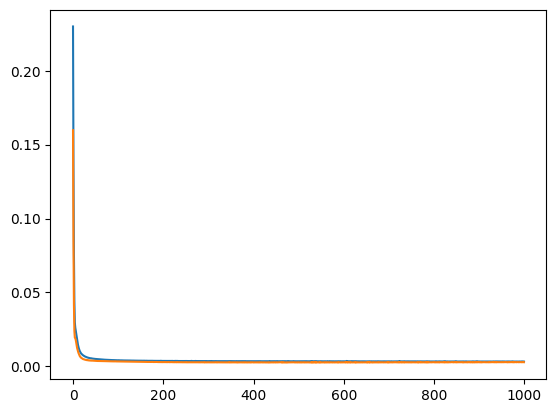

In [97]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])